# `IslandTime` Workflow Example
Welcome to `IslandTime`!
This Workflow allows you to extract and analyse satellite images and localised time series for small coral reef islands in Small Island Developing States (SIDS). It uses a combination of multiple existing packages and modules, including `Rbeast` for time series decomposition and `CoastSat` for the extraction of images from Google Earth Engine and pre-processing. 

Note that the Workflow is currently tailored to analyse coral reef islands located in the Maldives, but we are working on expanding the analysis usability to other SIDS.

In [2]:
# import modules
from IslandTime import *
import os
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Get everything from scratch
If results are already available, go see Section 2.
## 1.1 Select the name of the island and the country

In [3]:
island = 'Hulhudhoo (South Maalhosmadulu)' # island in South Maalhosmadulu atoll
country = 'Maldives'

## 1.2 Initialise the data/dictionary file
It will extract/query:
- Longitude and latitude of the island (either from `OpenStreetMap`, Wikipedia, or `GeoKeo`);
- Polygon (bbox) around the island (either from `OpenStreetMap` or manually);
- List of available satellite images (Sentinel-2, Landsat-8, Landsat-9).

In [43]:
auto_polygon = True

if auto_polygon:
    # run PreTimeSeries (all automatically)
    island_info = PreTimeSeries(island, country).main()

else:
    # OR run PreTimeSeries with a manually defined polygon (you can copy-paste the coordinates from Google Maps for example)
    west, north, east, south = 5.277798530534431, 73.02208938422001, 5.271678467912299, 73.02886584165316
    polygon_array = [[north, west],
                    [south, west],
                    [south, east],
                    [north, east],
                    [north, west]]

    island_info = PreTimeSeries(island, country, polygon=polygon_array).main()


-------------------------------------------------------------------
Retrieving general and spatial information about the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information will be extracted/calculated: other and duvat_magnan_2019 ~
No other information available.
~ Retrieving information from Duvat & Magnan (2019). ~
Island not found in the database.


## 1.2 Download satellite images and extract time series and useful information
Time series extracted (if available):
- Sea surface temperature (SST) from NOAA Coral Reef Watch (CRW);
- Nighttime light (NTL) from remote sensing (DMSP-OLS);
- Disasters for the country from the Emergency Events Database (EM-DAT);
- All available data for the country from World Bank;
- All available data for the country from World Health Organization (WHO);
- Sea level anomaly from remote sensing (Copernicus);
- All available data of Penman-Monteith-Leuning Evapotranspiration V2 (PML_V2);
- Tide-gauge sea-level data from the Permanent Service for Mean Sea Level (PSMSL);
- Data from the Pacific Sea Level and Geodetic Monitoring Project (PSLGM);
- Climate/weather variables from ERA5;

Satellite image download using `CoastSat` (note: here we use this package to download and pre-process images only; coastline time series will be extracted later):
- Download all available Sentinel-2, Landsat-8 and Landsat-9 images and metadata until 31/12/2023;
- Define a reference shoreline (either extracted from `OpenStreetMap` or traced manually);
- Automatically defined transects separated by 5 m.


Other useful information:
- Ecological Coastal Units (ECUs) for each transect;
- Masks of vegetation (NDVI).


In [44]:
island_info = Workflow(island, country, run_all=True, execute_segmentation=False, execute_preprocess=False, execute_analysis=False).main()


-------------------------------------------------------------------
Retrieving general and spatial information about the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information will be extracted/calculated: other and duvat_magnan_2019 ~
No other information available.
~ Retrieving information from Duvat & Magnan (2019). ~
Island not found in the database.

-------------------------------------------------------------------
Retrieving Sea surface temperature (NOAA Coral Reef Watch)
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ Information already available. Returning data. ~

-------------------------------------------------------------------
Retrieving Nighttime light (DMSP-OLS)
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ Information alrea

In [45]:
# if you want to visualise the reference shoreline and transect
%matplotlib qt
plot_shoreline_transects(island_info)

## 1.3 Segmentation of the satellite images and coastline time series extraction for each transect
Steps:
- Threshold contouring of the waterline based on prominent spectral features for NDVI, NDWI and NIR;
- Convert countours into geo-referenced polygons;
- Define the optimal polygon (automatically) or let the user choose the polygon;
- Extract time series of the coastline position along a transect (for each transect).


-------------------------------------------------------------------
Retrieving all information available for the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               coastline_type
spatial_reference
               latitude
               longitude
               polygon
               reference_shoreline
               transects
               area_country
               reference_shoreline_buffer_L8
               reference_shoreline_buffer_L9
               reference_shoreline_buffer_S2
               x_intersections
               y_intersections
image_collection_dict
               description
               S2
               L5
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
           

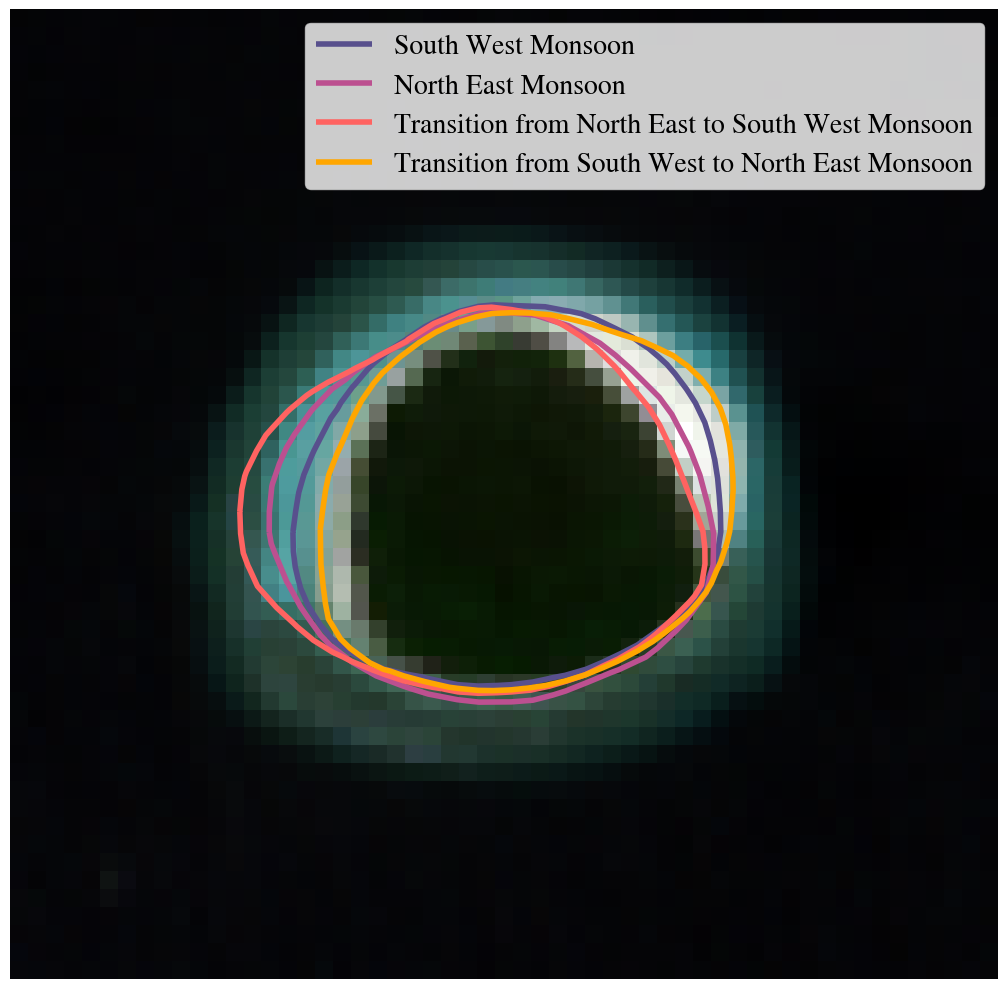

In [11]:
%matplotlib inline
island_info = Workflow(island, country, run_all=False, execute_segmentation=True, execute_preprocess=False, execute_analysis=False).main()

## 1.4 Time series pre-processing
Steps:
- Remove outliers;
- Align time periods for all time series;
- Monthly averaging.

In [12]:
island_info = Workflow(island, country, run_all=False, execute_segmentation=False, execute_preprocess=True, execute_analysis=False).main()


-------------------------------------------------------------------
Retrieving all information available for the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               coastline_type
spatial_reference
               latitude
               longitude
               polygon
               reference_shoreline
               transects
               area_country
               reference_shoreline_buffer_L8
               reference_shoreline_buffer_L9
               reference_shoreline_buffer_S2
               x_intersections
               y_intersections
image_collection_dict
               description
               S2
               L5
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
           

## 1.5 Time series analysis
Steps:
- Test for presence of trend and quantification;
- Test for presence of seasonality and quantification;
- Test for stationarity;
- Time series decomposition using BEAST and STL;
- Seasonal component characterisation and modelling;
- Association with the phases of the Indian Monsoon;
- Spatial plotting.


-------------------------------------------------------------------
Retrieving all information available for the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               coastline_type
spatial_reference
               latitude
               longitude
               polygon
               reference_shoreline
               transects
               area_country
               reference_shoreline_buffer_L8
               reference_shoreline_buffer_L9
               reference_shoreline_buffer_S2
               x_intersections
               y_intersections
image_collection_dict
               description
               S2
               L5
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
           

Transect: 100%|██████████| 64/64 [00:07<00:00,  8.65it/s]


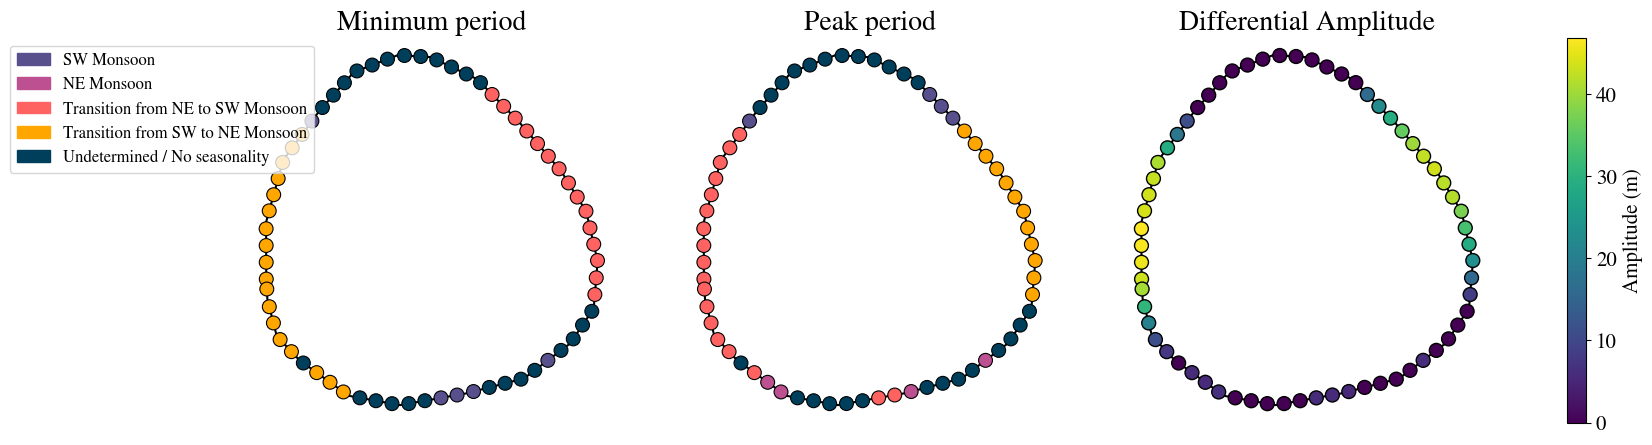

In [16]:
%matplotlib inline
dict_B = run_BEAST(island, country)
island_info = Workflow(island, country, run_all=False, execute_segmentation=False, execute_preprocess=False, execute_analysis=True).main()

# 2. Get results if already available
Structure of the data dictionary:
- `general_info`: island name, atoll, country
- `spatial_reference`: latitude, longitude, reference shoreline, transects, polygon (bbox)
- `image_collection_dict`: Google Earth Engine collections
- `timeseries_vegetation`: vegetation masks
- `characteristics_ECU`: Ecological Coastal Units for each transect
- `timeseries_coastsat`: metadata on satellite imagery downloading
- `timeseries_segmentation`: results of image segmentation
- `timeseries_preprocessing`: pre-processed coastline time series (raw & optimal time period) (see 'optimal time period' $\rightarrow$ 'dict_coastline_timeseries' for coastline time series that are used in our work)
- `timeseries_analysis`: trend, seasonal, and stationarity results for each transect
- all others : time series of other variables (i.e., not coastline time series)

In [17]:
island_info = retrieve_island_info(island, country)


-------------------------------------------------------------------
Retrieving all information available for the island
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

~ The following information is available: ~

general_info
               island
               country
               coastline_type
spatial_reference
               latitude
               longitude
               polygon
               reference_shoreline
               transects
               area_country
               reference_shoreline_buffer_L8
               reference_shoreline_buffer_L9
               reference_shoreline_buffer_S2
               x_intersections
               y_intersections
image_collection_dict
               description
               S2
               L5
               L7
               L8
               L9
timeseries_CRW
               description
               description_timeseries
               source
           

## Plot result for a specific transect


-------------------------------------------------------------------
Time series analysis
Island: Hulhudhoo (South Maalhosmadulu), Maldives
-------------------------------------------------------------------

Plotting characterisation


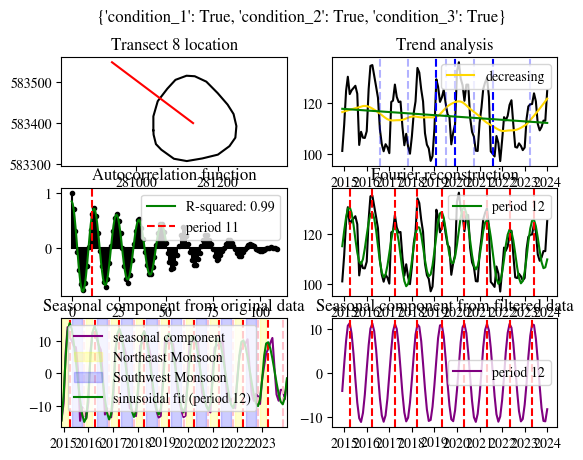

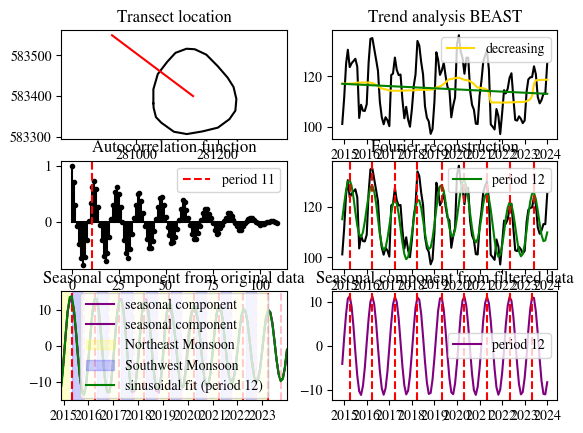

(<Figure size 640x480 with 9 Axes>,
 array([<Axes: xlabel='[]', ylabel='Y'>,
        <Axes: xlabel='[]', ylabel='season'>,
        <Axes: xlabel='[]', ylabel='Pr(scp)'>,
        <Axes: xlabel='[]', ylabel='sOrder'>,
        <Axes: xlabel='[]', ylabel='trend'>,
        <Axes: xlabel='[]', ylabel='Pr(tcp)'>,
        <Axes: xlabel='[]', ylabel='tOrder'>,
        <Axes: xlabel='[]', ylabel='slpsgn'>,
        <Axes: xlabel='time', ylabel='error'>], dtype=object))

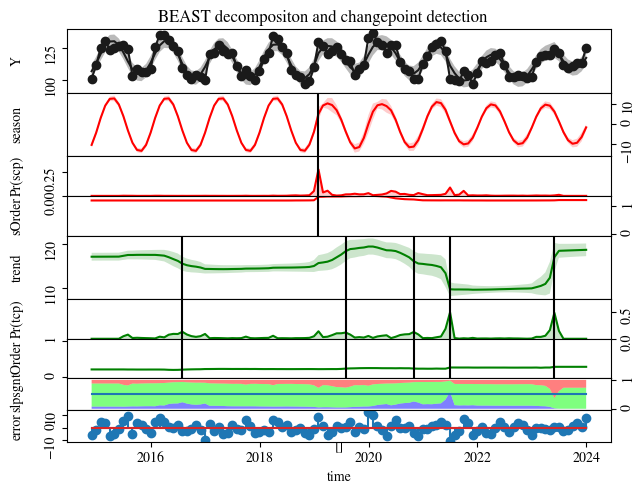

In [18]:
transect = 8
# plot results from this study 
island_info = TimeSeriesAnalysis(island_info, overwrite=True, plot_only=True, transect_to_plot=transect).main()
# plot results from BEAST directly
rb.plot(dict_B['coastline_position_transect_{}_waterline'.format(transect)])